In [1]:
########################################
#             PATH SETUP
########################################

import sys
import os
sys.path.insert(0, os.path.abspath("../"))


########################################
#             LIBRERIES SETUP
########################################
import numpy as np
import matplotlib.pyplot as plt
from lemer.rngs import MultiStreamRNG
from lemer.rvms import *
from IPython.display import display, Markdown, Image
########################################
#             SIS Library
########################################
from test.sis2 import SIS2

In [2]:
sis2 = SIS2()
display(Markdown("## SIS2 Test"))
sis2.run(last=200)
sis2.print_stats()

## SIS2 Test

=== SIS2 Statistics ===
Setup frequency: 0.39
Average order per period: 30.41
Average order when ordering: 78.97
Average demand per period: 30.41
Average holding level: 42.18
Average shortage level: 0.41
Final inventory level: 80.00
Average inventory level: 48.15
Total inventory level: 481.50


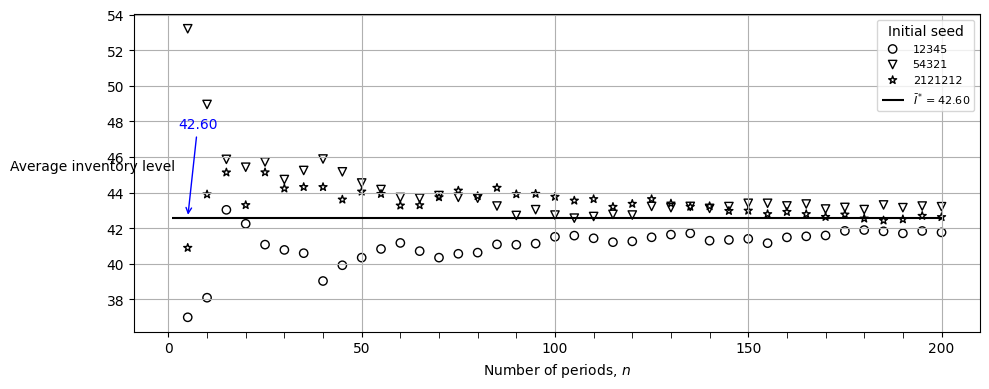

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Assicurati di importare la tua classe SIS2 così com’è
# from il_tuo_modulo import SIS2

def plot_avg_inventory_vs_n(seeds, N=200, step=5):
    xs = np.arange(step, N+1, step)
    markers = ['o', 'v', '*']
    fig, ax = plt.subplots(figsize=(10, 4))

    # Parametri teorici
    I_plus, I_minus = 42.86, 0.26
    theoretical = I_plus - I_minus  # ≃ 42.60

    for seed, marker in zip(seeds, markers):
        avgI = []
        for n in xs:
            sim = SIS2(seed=seed)
            sim.run(last=n)
            # average net inventory = (sum of per-period holding) 
            #                      - (sum of per-period shortage)
            avg = (np.sum(sim.sum.holding) - np.sum(sim.sum.shortage)) / n
            avgI.append(avg)

        ax.scatter(xs, avgI,
                   marker=marker,
                   facecolors='none',
                   edgecolors='black',
                   label=str(seed))

    # linea teorica
    ax.hlines(theoretical, xmin=1, xmax=N,
              colors='black', linestyles='-',
              label=rf'$\bar{{I}}^*={theoretical:.2f}$')

    # annotazione
    ax.annotate(f'{theoretical:.2f}',
                xy=(step, theoretical),
                xytext=(step/2, theoretical + 5),
                arrowprops=dict(arrowstyle='->', color='blue'),
                color='blue', fontsize=10)

    # ticks maggiori e minori
    ax.set_xticks(np.arange(0, N+1, 50))
    ax.set_xticks(np.arange(0, N+1, 10), minor=True)
    ax.tick_params(axis='x', which='minor', length=4)

    # limiti e griglia

    ax.grid(True)

    # etichette e legenda
    ax.set_xlabel('Number of periods, $n$')
    ax.set_ylabel('Average inventory level', rotation=0, labelpad=10)
    ax.legend(title='Initial seed', loc='upper right', fontsize=8)

    fig.tight_layout()
    plt.show()

# Esempio di utilizzo
seeds = [12345, 54321, 2121212]
plot_avg_inventory_vs_n(seeds)


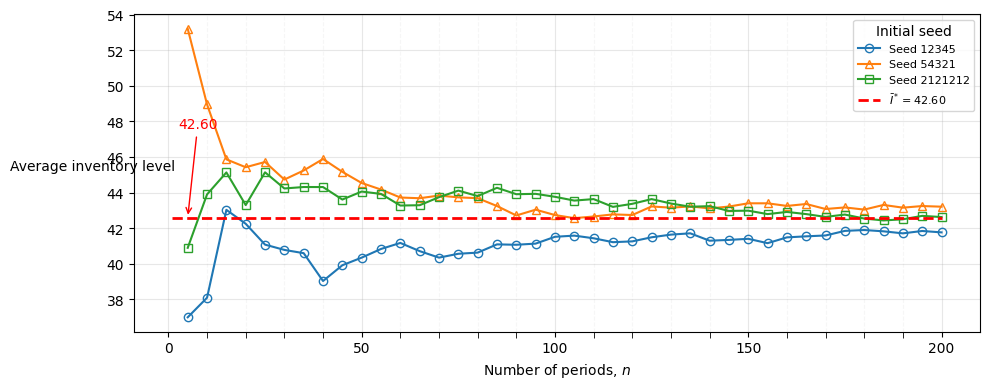

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assicurati di importare la tua classe SIS2 così com’è
# from il_tuo_modulo import SIS2

def plot_avg_inventory_vs_n(seeds, N=200, step=5):
    xs = np.arange(step, N+1, step)
    markers = ['o', '^', 's']
    fig, ax = plt.subplots(figsize=(10, 4))

    # Parametri teorici
    I_plus, I_minus = 42.86, 0.26
    theoretical = I_plus - I_minus  # ≃ 42.60

    for (seed, marker), color in zip(zip(seeds, markers), plt.rcParams['axes.prop_cycle'].by_key()['color']):
        avgI = []
        for n in xs:
            sim = SIS2(seed=seed)
            sim.run(last=n)
            avg = (np.sum(sim.sum.holding) - np.sum(sim.sum.shortage)) / n
            avgI.append(avg)
        # linea colorata + marker
        ax.plot(xs, avgI, linestyle='-', marker=marker,
                markersize=6, markerfacecolor='none',
                color=color, label=f'Seed {seed}')

    # linea teorica in rosso
    ax.hlines(theoretical, xmin=1, xmax=N,
              colors='red', linestyles='--',
              linewidth=2,
              label=rf'$\bar{{I}}^*={theoretical:.2f}$')

    # annotazione
    ax.annotate(f'{theoretical:.2f}',
                xy=(step, theoretical),
                xytext=(step/2, theoretical + 5),
                arrowprops=dict(arrowstyle='->', color='red'),
                color='red', fontsize=10) 

    # ticks maggiori e minori
    ax.set_xticks(np.arange(0, N+1, 50))
    ax.set_xticks(np.arange(0, N+1, 10), minor=True)
    ax.tick_params(axis='x', which='minor', length=4)

    # grid
    ax.grid(True, which='major', linestyle='-', alpha=0.3)
    ax.grid(True, which='minor', linestyle='--', alpha=0.1)

    # etichette e legenda
    ax.set_xlabel('Number of periods, $n$')
    ax.set_ylabel('Average inventory level', rotation=0, labelpad=10)
    ax.legend(title='Initial seed', loc='upper right', fontsize=8)

    fig.tight_layout()
    plt.show()

# Esempio di utilizzo
seeds = [12345, 54321, 2121212]
plot_avg_inventory_vs_n(seeds)


In [5]:
%%capture
!jupyter nbconvert --to html --no-input sis2.ipynb
